<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Random Variables and Common Distributions - Independent Practice


---

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
 
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### You have a box with 120 light bulbs. The probability of a light bulb being defect is 5 %. 

- What would be the most probable number of defective light bulbs in your box?

- What is the probability of having at most three defective light bulbs in the box?

Assume a binomial distribution. 

In [2]:
n = 120
p = 0.05
binom_dist = stats.binom(n,p)

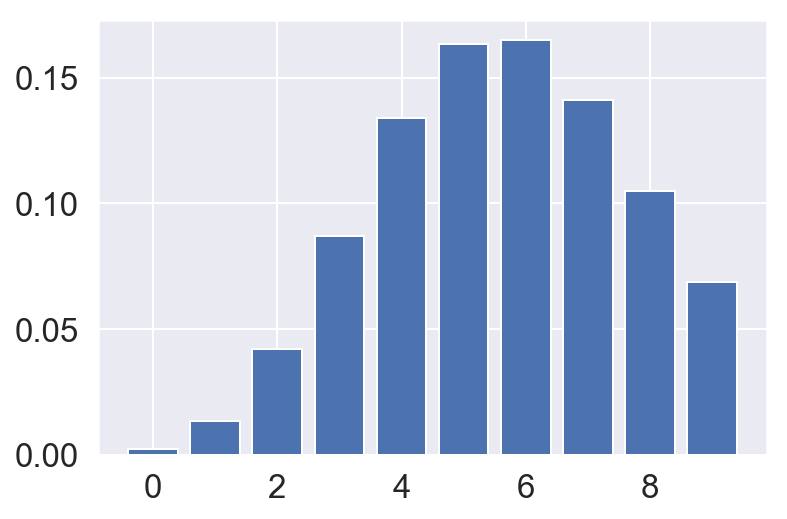

In [3]:
plt.bar(range(10),binom_dist.pmf(range(10)))
plt.show()

In [4]:
# Extracting the most probable value
binom_dist.pmf(range(n+1)).argmax()

6

In [5]:
# Probability of having at most three defective light bulbs in the box
binom_dist.cdf(3)

0.14440761335245336

In [6]:
# Similar results using the Poisson distribution instead of the binomial distribution

rate = n*p
poisson_dist = stats.poisson(rate)
poisson_dist.pmf(range(n+1)).argmax()

6

In [7]:
poisson_dist.cdf(3)

0.15120388277664784

#### The height of GA students follows a normal distribution with mean 174 cm and standard deviation 6 cm (it is a fictitious example). 

- What is the probability of a GA student being larger than 170 cm?
- What is the probability of having a height between 172 and 180 cm?

In [8]:
height_mean = 174
height_std = 6
norm_dist = stats.norm(height_mean,height_std)

In [9]:
# probability of a GA student being larger than 170 cm using the cdf
1 - norm_dist.cdf(170)

0.7475074624530771

In [10]:
# the same result using the survival function
norm_dist.sf(170)

0.7475074624530771

In [11]:
# probability of having a height between 172 and 180 cm using cdf
(1-norm_dist.cdf(172))-(1-norm_dist.cdf(180))

0.47190340588677926

In [12]:
norm_dist.cdf(180)-norm_dist.cdf(172)

0.47190340588677926

In [13]:
# probability of having a height between 172 and 180 cm using survival function
norm_dist.sf(172)-norm_dist.sf(180)

0.47190340588677926

#### According to health statistics, 4 in 100000 people have a rare genetic disease.

What is the probability that in  a city with 300000 inhabitants

- 0, 2, or 5 persons 
- between 4 and 7 persons

have this disease? Assume a Poisson distribution.

In [14]:
# rate is 12 per 300000 inhabitants
rate = 4*3
# Probability for number of cases from 0 to 9
poisson_dist = stats.poisson(rate)
poisson_dist.pmf(range(15))

array([6.14421235e-06, 7.37305482e-05, 4.42383289e-04, 1.76953316e-03,
       5.30859947e-03, 1.27406387e-02, 2.54812775e-02, 4.36821900e-02,
       6.55232849e-02, 8.73643799e-02, 1.04837256e-01, 1.14367916e-01,
       1.14367916e-01, 1.05570384e-01, 9.04889002e-02])

In [15]:
poisson_dist.cdf(7) - poisson_dist.cdf(3)

0.08721270563238441

In [16]:
# rate is 12 per 300000 inhabitants
rate = 4/10**5
# Probability for number of cases from 0 to 9
poisson_dist = stats.poisson(rate)
poisson_dist.pmf(range(15))

array([9.99960001e-01, 3.99984000e-05, 7.99968001e-10, 1.06662400e-14,
       1.06662400e-19, 8.53299201e-25, 5.68866134e-30, 3.25066362e-35,
       1.62533181e-40, 7.22369694e-46, 2.88947877e-51, 1.05071955e-56,
       3.50239851e-62, 1.07766108e-67, 3.07903166e-73])

#### Show that binomial and Poisson distribution look similar if $n$ is large, $p$ sufficiently small and $\lambda=np$.

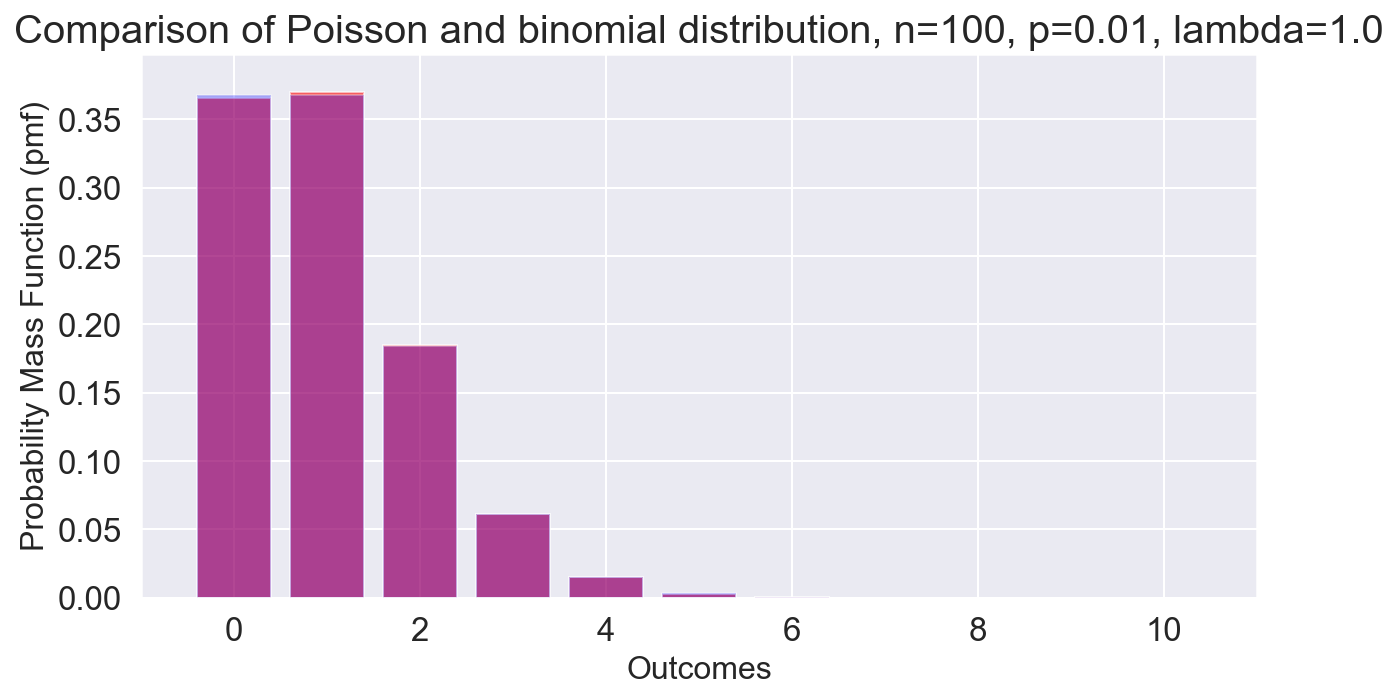

In [17]:
low = 0
high = 10
lw = 20
n = 100
p = 0.01

title = 'Comparison of Poisson and binomial distribution, n={}, p={}, lambda={}'.format(n,p,n*p)

x = np.arange(low, high+1.)
    
fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
ax.set_xlim(low-1, high+1)
ax.set_xlabel('Outcomes', fontsize=16)
ax.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
ax.bar(x, stats.binom(n,p).pmf(x), color='red', alpha=0.6)
ax.bar(x, stats.poisson(n*p).pmf(x), color='blue', alpha=0.3)
ax.set_ylim(0, np.max(stats.poisson(n*p).pmf(x))+0.03)

plt.title(title, fontsize=20)

plt.show()

#### Show that binomial and normal distribution look similar if $n$ is sufficiently large, $p$ and $1-p$ both not too small and $\mu=n p$, $\sigma=\sqrt{n p (1-p)}$.

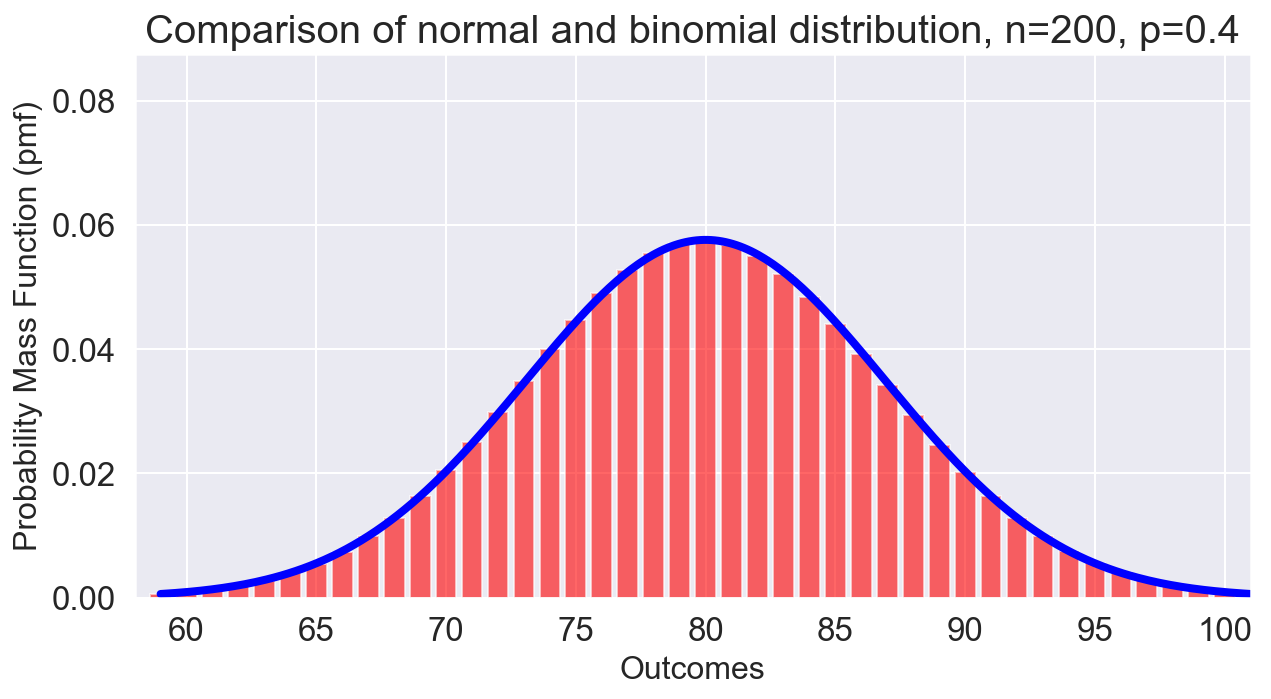

In [18]:
n = 200
p = 0.4
low = int(n*p-3*(n*p*(1-p))**0.5)
high = int(n*p+3*(n*p*(1-p))**0.5)
lw = 20

title = 'Comparison of normal and binomial distribution, n={}, p={}'.format(n,p)

x = np.arange(low, high+1.)
x_c = np.linspace(low,high+1.,300)    
fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
ax.set_xlim(low-1, high+1)
ax.set_xlabel('Outcomes', fontsize=16)
ax.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
ax.bar(x, stats.binom(n,p).pmf(x), color='red', alpha=0.6)
ax.plot(x_c, stats.norm(n*p,(n*p*(1-p))**0.5).pdf(x_c), color='blue', lw=lw/5.)
ax.set_ylim(0, np.max(stats.binom(n,p).pmf(x))+0.03)

plt.title(title, fontsize=20)

plt.show()